<a href="https://colab.research.google.com/github/smitaforward/Data_Science/blob/master/Text_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://realpython.com/python-keras-text-classification/

In [2]:
# load the file from drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Prep Data

In [3]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
import pandas as pd

filepath_dict = {'yelp':'drive/My Drive/data/sentiment labelled sentences/yelp_labelled.txt',
               'amazon':'drive/My Drive/data/sentiment labelled sentences/amazon_cells_labelled.txt',
               'imdb': 'drive/My Drive/data/sentiment labelled sentences/imdb_labelled.txt'}

In [0]:
df_list = []
for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names = ['sentence','label'], sep = '\t')
  df['source'] = source
  df_list.append(df)

In [0]:
df = pd.concat(df_list)

In [7]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [8]:
df.tail()

,sentence,label,source
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb
747,All in all its an insult to one's intelligence...,0,imdb


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 747
Data columns (total 3 columns):
sentence    2748 non-null object
label       2748 non-null int64
source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


# Base Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


In [12]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  vectorizer = CountVectorizer()
  vectorizer.fit(sentences_train)
  X_train = vectorizer.transform(sentences_train)
  X_test = vectorizer.transform(sentences_test)
  
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)
  
  score=classifier.score(X_test,y_test)
  print("Accuracy for {} data: {:.4f}".format(source, score))
  

Accuracy for yelp data: 0.8160
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7380


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# keras with BOW

In [13]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  x = range(1, len(acc)+1)
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  
  plt.plot(x, acc, 'b',label = 'Training acc')
  plt.plot(x, val_acc,'r', label = 'Validation acc')
  plt.title('Training and Validation Accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.legend()
  

Accuracy for yelp data: 0.7840
Accuracy for amazon data: 0.8160
Accuracy for imdb data: 0.6898


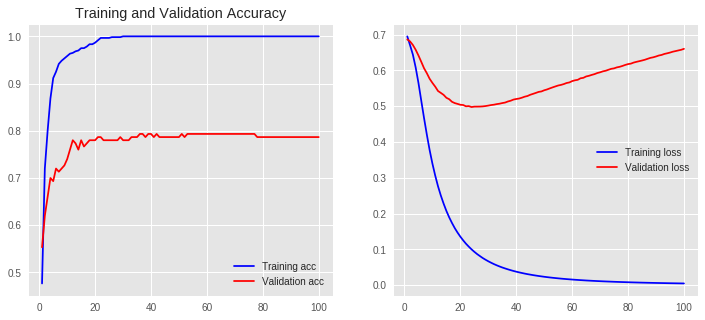

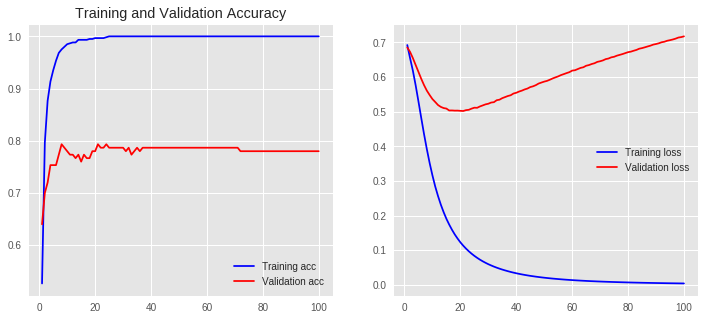

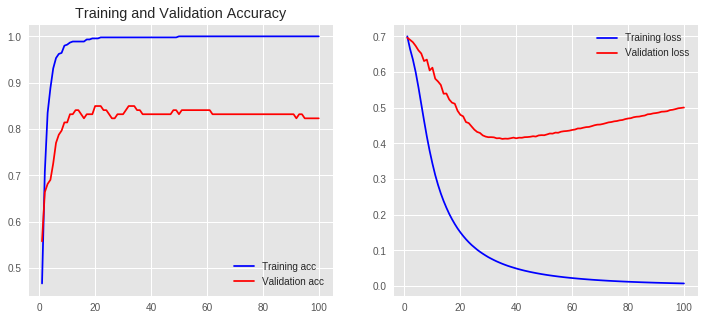

In [24]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  vectorizer = CountVectorizer()
  vectorizer.fit(sentences_train)
  X_train = vectorizer.transform(sentences_train)
  X_test = vectorizer.transform(sentences_test)
  
  input_dim = X_train.shape[1]
  
  model = Sequential()
  model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  
  model.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))




# keras with local word embedding

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
maxlen = 100
embedding_dim = 50

Accuracy for yelp data: 0.7800
Accuracy for amazon data: 0.8360
Accuracy for imdb data: 0.7326


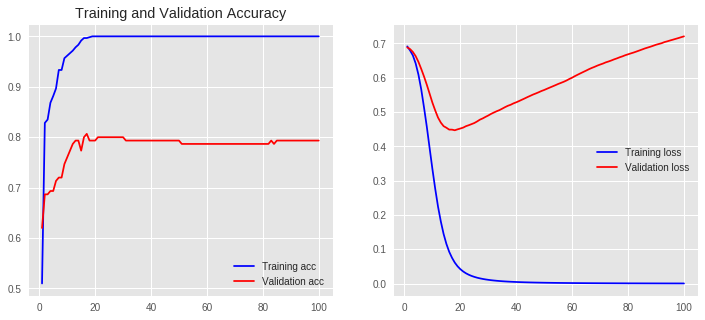

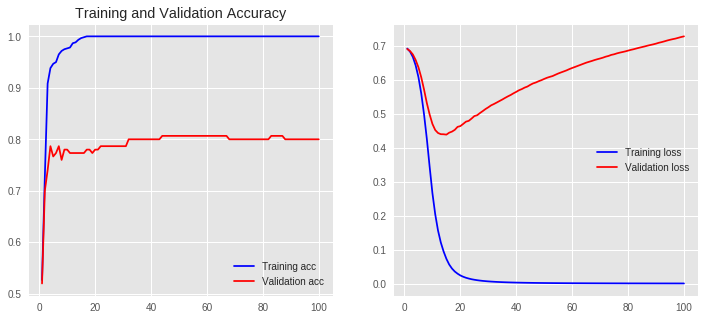

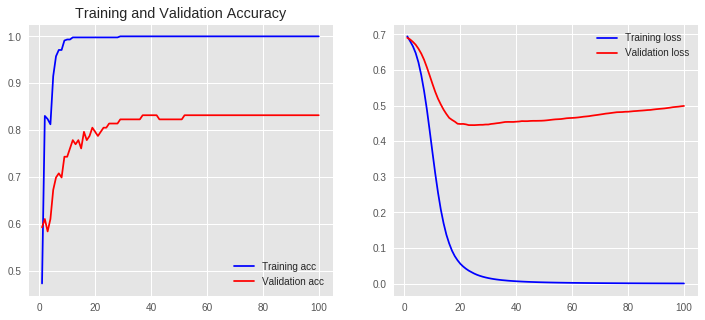

In [61]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  tokenizer = Tokenizer(num_words = 5000)
  tokenizer.fit_on_texts(sentences_train)
  X_train = tokenizer.texts_to_sequences(sentences_train) # num_words will be applied
  X_test = tokenizer.texts_to_sequences(sentences_test)
  vocab_size = len(tokenizer.word_index)+1 #tokenizer won't apply num_words
  
  X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
  X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
  
  
  model = Sequential()
  model.add(layers.Embedding(input_dim = vocab_size,
                         output_dim = embedding_dim,
                         input_length = maxlen))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(10, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
  
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))

In [0]:
# keras with pretrained word embedding

In [66]:
!mkdir data2 && wget http://nlp.stanford.edu/data/glove.6B.zip && unzip glove.6B.zip -d data/

--2019-01-17 16:20:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-01-17 16:20:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1      100%[===================>] 822.24M  57.3MB/s    in 14s     

2019-01-17 16:20:28 (57.4 MB/s) - ‘glove.6B.zip.1’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: data/glove.6B.50d.txt   
  inflating: data/glove.6B.100d.txt  
  inflating: data/glove.6B.200d.txt  
  inflating: data/glove.6B.300d.txt  


In [70]:

!ls 

data  data2  drive  glove.6B.zip  glove.6B.zip.1  sample_data
